<a href="https://colab.research.google.com/github/czambrano26/MAT-421/blob/main/mat_421_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import pandas as pd
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime

from sklearn.metrics import mean_squared_error
from google.colab import files

warnings.filterwarnings('ignore')

In [2]:
uploaded = files.upload()

Saving amzn.us.txt to amzn.us.txt


In [3]:
df = pd.read_csv("amzn.us.txt")
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-01-04,136.28,136.61,133.14,133.90,7595995,0
1,2010-01-05,133.25,135.48,131.81,134.69,8851066,0
2,2010-01-06,134.63,134.73,131.65,132.25,7178209,0
3,2010-01-07,131.96,132.32,128.80,130.00,11014197,0
4,2010-01-08,130.70,133.68,129.03,133.52,9826568,0


In [4]:
print(df.head())
print(df.shape)
print(df.columns)

         Date    Open    High     Low   Close    Volume  OpenInt
0  2010-01-04  136.28  136.61  133.14  133.90   7595995        0
1  2010-01-05  133.25  135.48  131.81  134.69   8851066        0
2  2010-01-06  134.63  134.73  131.65  132.25   7178209        0
3  2010-01-07  131.96  132.32  128.80  130.00  11014197        0
4  2010-01-08  130.70  133.68  129.03  133.52   9826568        0
(1980, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


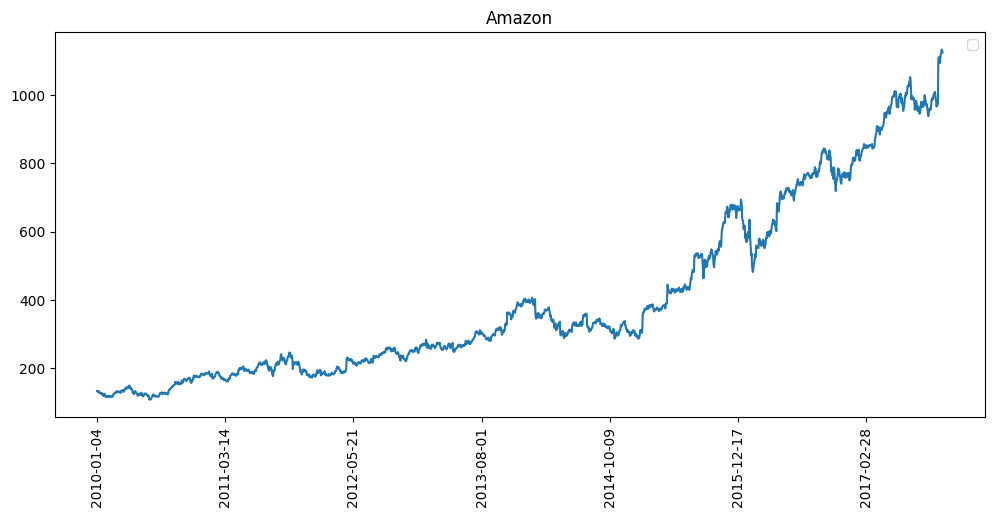

In [79]:
# .plot(color='red', style='o', markersize=1)
plt.figure(figsize=(12,5))
plt.plot(df[['Close']])
plt.title("Amazon")
plt.xticks(np.arange(0,1979, 300), df['Date'][0:1979:300], rotation=90)
plt.legend()

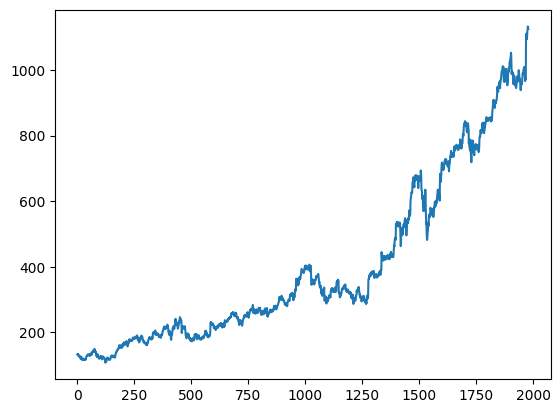

In [81]:
dates = df['Date'][0:1979:1]

i  = 0
for x in dates:
  i += 1

x = range(i + 1)

y = df[['Close']]

plt.plot(x,y)

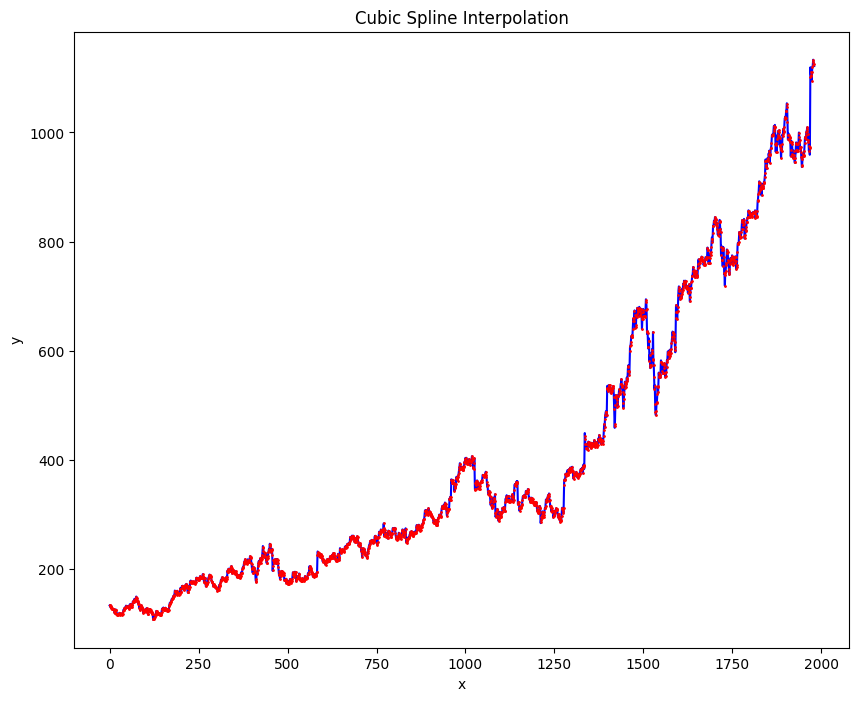

In [77]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

f = CubicSpline(x, y, bc_type='natural')

x_new = np.linspace(0, 1980, 10000) 
y_new = f(x_new) 

plt.figure(figsize = (10,8)) 
plt.plot(x_new, y_new, 'b') 
plt.plot(x, y, 'ro', markersize=1) 
plt.title('Cubic Spline Interpolation') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.show()

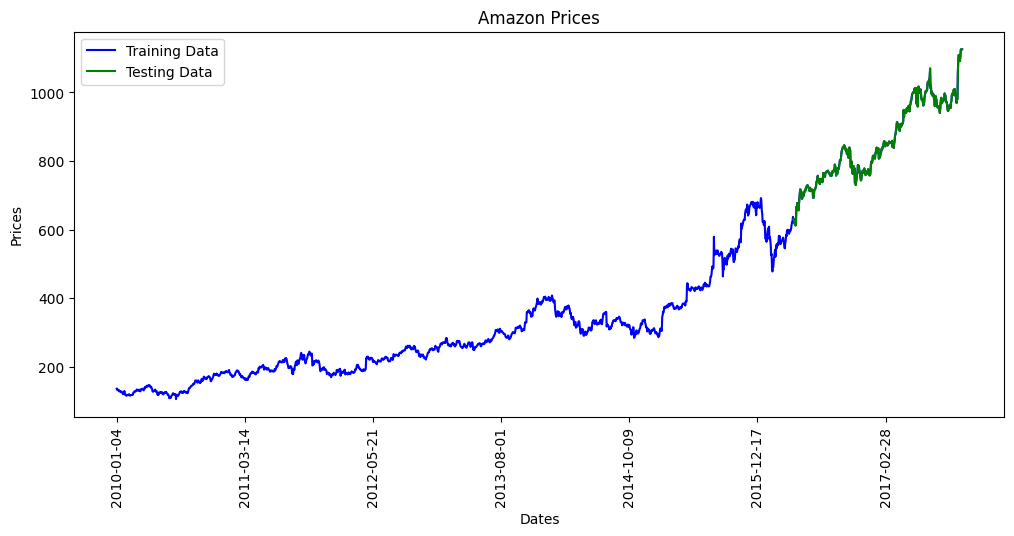

In [26]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,5))
plt.title('Amazon Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1979, 300), df['Date'][0:1979:300], rotation=90)
plt.legend()

In [ ]:
# gonna try cubic spline interpolation


DO NOT GO PAST HERE FOR NOW

Text(0.5, 1.0, 'Tesla Cumulative Returns')

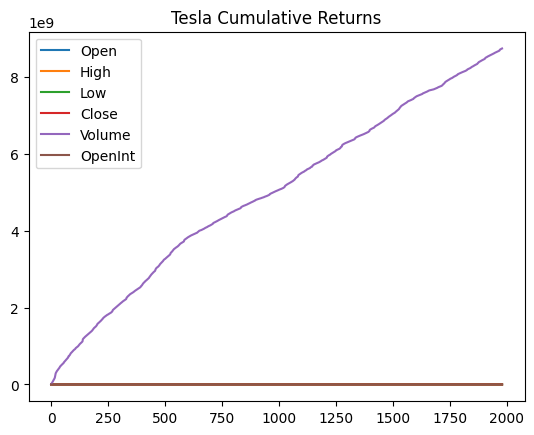

In [6]:
# Comulative Return
dr = df.cumsum()
dr.plot()
plt.title('Tesla Cumulative Returns')

Text(0.5, 1.0, 'Amazon Autocorrelation plot')

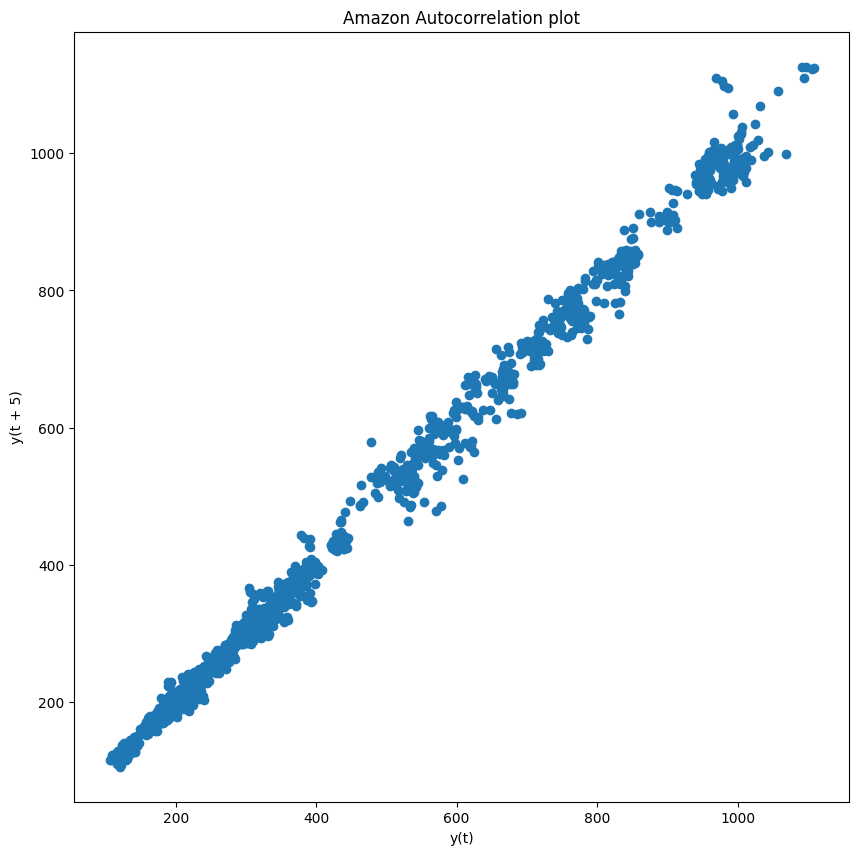

In [7]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Amazon Autocorrelation plot')

In [10]:
# last data date in text file is 2017-11-10
df['Date'][1979]

'2017-11-10'

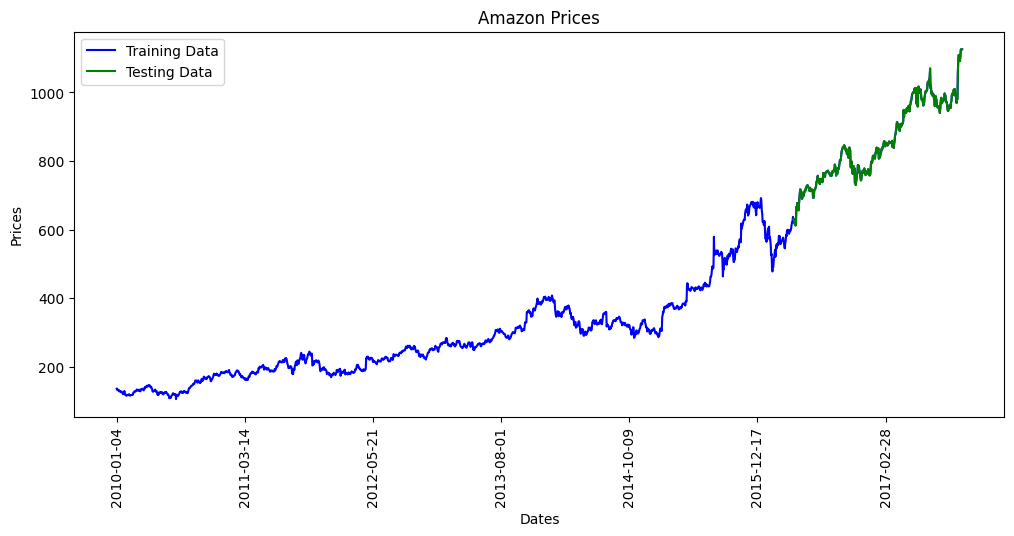

In [12]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,5))
plt.title('Amazon Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1979, 300), df['Date'][0:1979:300], rotation=90)
plt.legend()

In [13]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [22]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 137.604
Symmetric mean absolute percentage error: 0.944


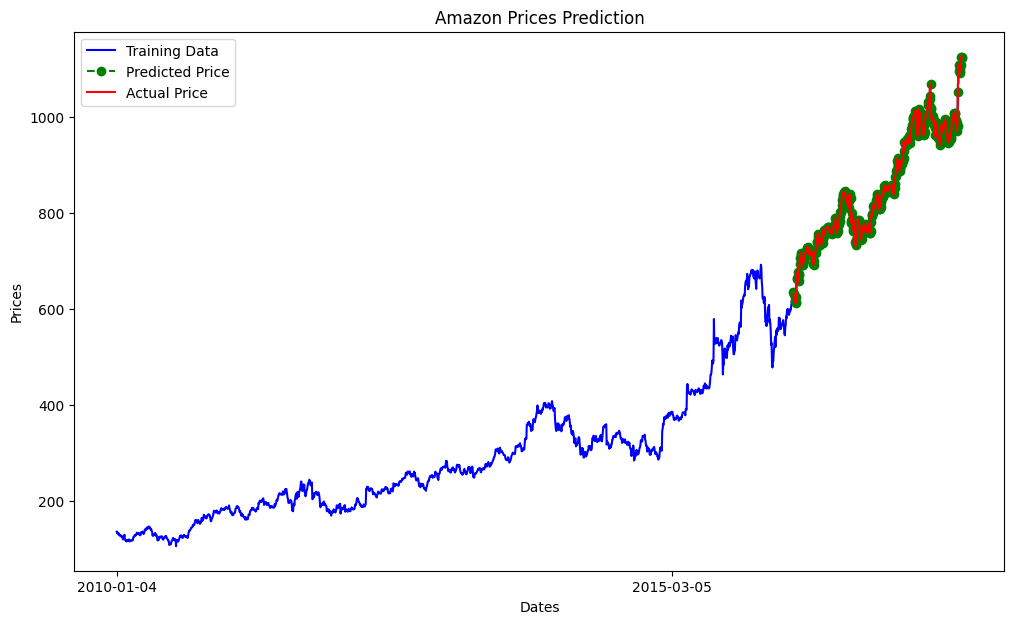

In [25]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Amazon Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,2000, 1300), df['Date'][0:2000:1300])
plt.legend()